In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('../data/query_output/query_2.csv', index_col=False)
df.head()

,URL,THISDOMAIN,CLICKS,URL_RANK,CLICK_PERCENTAGE
0,http://fifaworldcup.yahoo.com,yahoo,180,1,48.39
1,http://www.fifa.com,fifa,13,2,3.49
2,http://worldsoccer.about.com,about,11,3,2.96
3,http://www.soccerphile.com,soccerphile,9,4,2.42
4,http://www.mapsofworld.com,mapsofworld,6,5,1.61


In [21]:
df = df[['URL', 'CLICKS']]
df.head()

,URL,CLICKS
0,http://fifaworldcup.yahoo.com,180
1,http://www.fifa.com,13
2,http://worldsoccer.about.com,11
3,http://www.soccerphile.com,9
4,http://www.mapsofworld.com,6


In [22]:
# Assuming df is your original DataFrame
# df = pd.read_csv('your_data.csv')  # Replace with your actual data loading code

# Identify rows with only 1 click
mask = df['CLICKS'] < 5

# Replace values in 'URL' and 'THISDOMAIN' columns with 'Other' for rows with only 1 click
df.loc[mask, ['URL']] = 'Other'

# Display the resulting DataFrame
print(df)

                               URL  CLICKS
0    http://fifaworldcup.yahoo.com     180
1              http://www.fifa.com      13
2     http://worldsoccer.about.com      11
3       http://www.soccerphile.com       9
4       http://www.mapsofworld.com       6
..                             ...     ...
99                           Other       1
100                          Other       1
101                          Other       1
102                          Other       1
103                          Other       1

[104 rows x 2 columns]


In [24]:
grouped_df = df.groupby('URL').agg({'CLICKS': 'sum'}).reset_index()

# Sort the DataFrame by 'CLICKS' in descending order
grouped_df = grouped_df.sort_values(by='CLICKS', ascending=False)

# Display the resulting DataFrame
grouped_df

,URL,CLICKS
1,http://fifaworldcup.yahoo.com,180
0,Other,136
3,http://www.fifa.com,13
2,http://worldsoccer.about.com,11
5,http://www.soccerphile.com,9
4,http://www.mapsofworld.com,6
6,http://www.soccertv.com,6
8,http://www.worldcupsoccer.com,6
7,http://www.wldcup.com,5


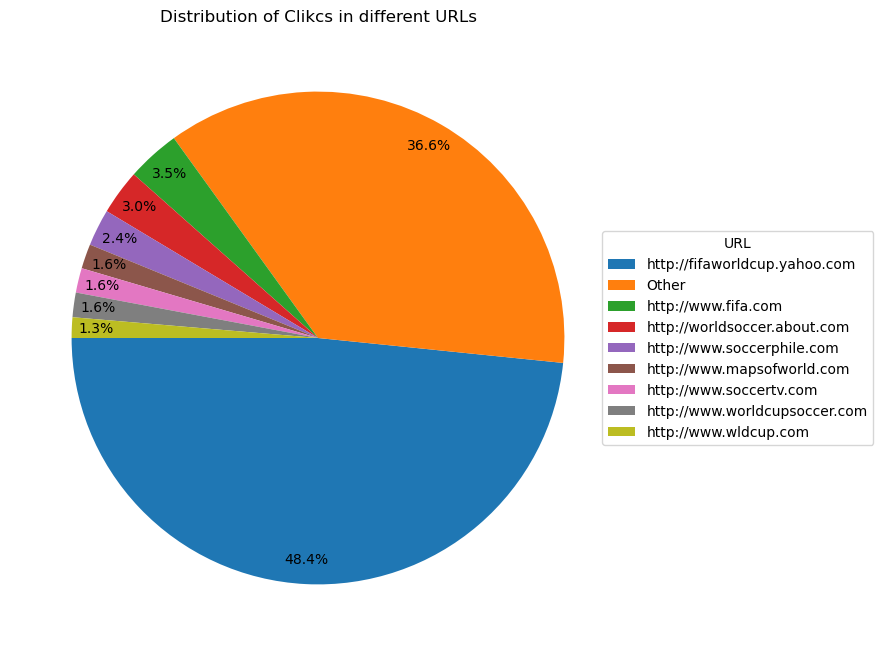

In [69]:
# Plotting a pie chart with labels set to None
plt.figure(figsize=(8, 8))
patches, _, _ = plt.pie(grouped_df['CLICKS'], labels=None, autopct='%1.1f%%', startangle=180, pctdistance=0.90)

# Creating a legend with labels from the URLs on the middle right
legend = plt.legend(grouped_df['URL'], title='URL', bbox_to_anchor=(0.95, 0.5), loc='center left')

plt.title('Distribution of Clikcs in different URLs')
plt.savefig('../Visuals/plots/query_2.png', bbox_inches='tight')

plt.show()